### Предобработка данных

In [1]:
import pandas as pd
data = pd.read_csv('heart_disease/heart_disease_uci.csv', sep=',')
print(data)

      id  age     sex         origin               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

In [2]:
display(data.head())

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   origin    920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


None

In [4]:
display(data.describe().round())

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.0,920.0,861.0,890.0,865.0,858.0,309.0,920.0
mean,460.0,54.0,132.0,199.0,138.0,1.0,1.0,1.0
std,266.0,9.0,19.0,111.0,26.0,1.0,1.0,1.0
min,1.0,28.0,0.0,0.0,60.0,-3.0,0.0,0.0
25%,231.0,47.0,120.0,175.0,120.0,0.0,0.0,0.0
50%,460.0,54.0,130.0,223.0,140.0,0.0,0.0,1.0
75%,690.0,60.0,140.0,268.0,157.0,2.0,1.0,2.0
max,920.0,77.0,200.0,603.0,202.0,6.0,3.0,4.0


In [5]:
data['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [6]:
data['num'].value_counts(sort = True, normalize=True) # определим процент каждого исхода

num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: proportion, dtype: float64

In [7]:
# Учитывая большое количество пропущенных значений, решено удалить бины slope, thal
data.drop(columns=['slope', 'thal'], inplace=True)

In [8]:
data = data.loc[data['trestbps'] != 0]
print(data)

      id  age     sex         origin               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 759
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    object 
 3   origin    303 non-null    object 
 4   cp        303 non-null    object 
 5   trestbps  303 non-null    float64
 6   chol      303 non-null    float64
 7   fbs       303 non-null    object 
 8   restecg   303 non-null    object 
 9   thalch    303 non-null    float64
 10  exang     303 non-null    object 
 11  oldpeak   303 non-null    float64
 12  ca        303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 35.5+ KB


In [11]:
data.isnull().sum()

id          0
age         0
sex         0
origin      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
ca          0
num         0
dtype: int64

### Переводим категориальные данные в бинарную или порядковую переменную.

In [12]:
from os.path import join 
from sklearn.neighbors import (KNeighborsRegressor, KNeighborsClassifier) 
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error, accuracy_score) 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, LabelEncoder)  
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from PIL import Image

In [14]:
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})
data['fbs'] = data['fbs'].astype(int)
data['exang'] = data['exang'].astype(int)
data.head()

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,num
0,1,63,NaN,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,0.0,0
1,2,67,NaN,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,3.0,2
2,3,67,NaN,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,2.0,1
3,4,37,NaN,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,0.0,0
4,5,41,NaN,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,0.0,0


In [16]:
le = LabelEncoder()
data['cp'] = le.fit_transform(data['cp'])
data['restecg'] = le.fit_transform(data['restecg'])
data.head()

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,num
0,1,63,NaN,Cleveland,3,145.0,233.0,1,0,150.0,0,2.3,0.0,0
1,2,67,NaN,Cleveland,0,160.0,286.0,0,0,108.0,1,1.5,3.0,2
2,3,67,NaN,Cleveland,0,120.0,229.0,0,0,129.0,1,2.6,2.0,1
3,4,37,NaN,Cleveland,2,130.0,250.0,0,1,187.0,0,3.5,0.0,0
4,5,41,NaN,Cleveland,1,130.0,204.0,0,0,172.0,0,1.4,0.0,0


In [17]:
! pip install seaborn
import seaborn as sns

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [18]:
! pip install matplotlib
import matplotlib.pyplot as plt

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


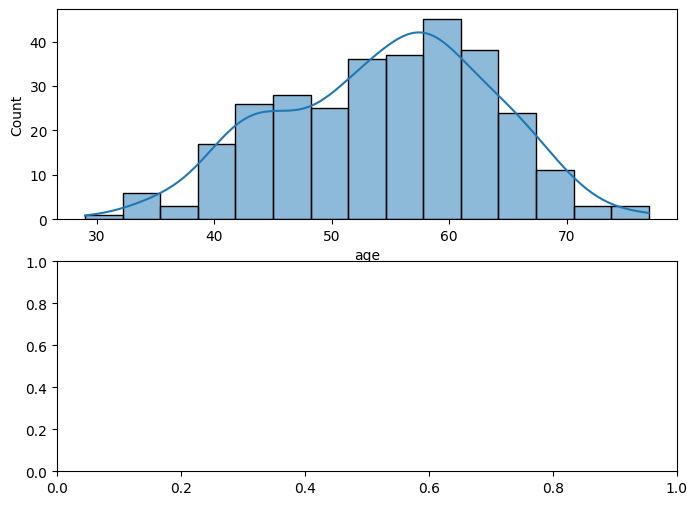

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.histplot(
    data=data,
    x='age',
    bins=15,
    kde=True,
    ax=axes[0]    
);

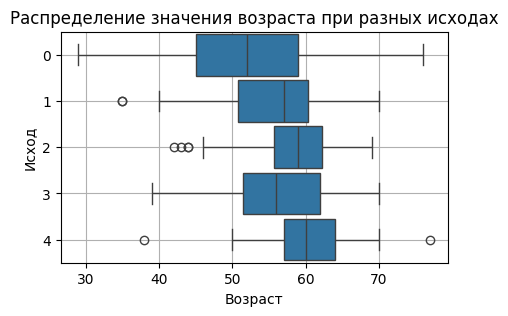

In [20]:
# Показать с помощью графика "ящик с усами" распределение возраста в группе num с разными исходами
fig = plt.figure(figsize=(5, 3))
boxplot = sns.boxplot(
    data=data,
    y='num',
    x='age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение значения возраста при разных исходах');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Исход');
boxplot.grid()
# Ка видно из графика, пациенты были старше c увеличением исхода. 

In [ ]:
# Показать с помощью графика "ящик с усами" распределение возраста в группе num с разными исходами
fig = plt.figure(figsize=(5, 3))
boxplot = sns.boxplot(
    data=data,
    y='num',
    x='age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение значения возраста при разных исходах');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Исход');
boxplot.grid()
# Ка видно из графика, пациенты были старше c увеличением исхода. 